## $\color{083D77}{\text{AdEx neuron in response to stochastic (noisy) input currents}}$

_This notebook is inspired to the simulation 'Cell response of mouse line Htr3a-CreNO152' provided by Allen Brain Atlas[1](https://celltypes.brain-map.org/experiment/electrophysiology/474626527)._

The aim is the exploration and visualization of the behavior of an Adaptive Exponential (AdEx) neuron in response to stochastic input currents. The code simulates the neuron's response to varying input currents while adding random fluctuations to the input currents, and then visualizes this response over time along with the noisy input current values exploring the effect of different input current amplitudes on the neuron's firing rate and membrane potential.


### $\color{EDAFB8}{\text{Methods}}$

The AdEx neuron model equation is taken from _Brette et al., 2005_ [1](https://journals.physiology.org/doi/full/10.1152/jn.00686.2005)

### $\color{EDAFB8}{\text{Simulation}}$

The simulation is carried out with the _SpikingNeuralNetworks.jl_ package in _JuliaLanguage_. 

1. The required packages, including Revise,  DrWatson, SNNExamples, Plots, and SpikingNeuralNetworks, are imported. The SNNExamples project is activated for convenient access to the necessary functionalities, as follows:

In [85]:
using Revise
using DrWatson
@quickactivate "SNNExamples"

using SpikingNeuralNetworks
using Plots
default(
    size=(800, 600),
    tickfontsize=10,
    guidefontsize=10,
    margin=8Plots.mm,
    titlefontsize=13,
    titlefontcolor=:orchid4,
    legend=:outertopright,
)

SNN.@load_units

1.0e-6

2. The necessary neuron model parameters are defined as follows:

In [86]:
τm = 30ms   #membrane capacitance
Vt = -50mV  #initial threshold 
Vr = -70mV #reference resting potential
El = Vr  #resting membrane potential

-70.0

3. The variable Is is defined as a range of current inputs in picoamperes (pA). 
It represents the range of current values that will be applied to the neuron to observe its behaviour.
In this case, the code creates a vector of input current values ranging from 10pA to 25pA in increments of 5pA.

In [87]:
Is = 10:5:25
Is  

10:5:25

4. The AdEx neuron is then defined using the _SNN.AdEx_ function. 
- The number of neurons (N) is determined by the length of the current input range (Is). 
- The AdEx parameters are set using the _SNN.AdExParameter_ struct, specifying: resting membrane potential (El), membrane time constant (τm), initial threshold potential (Vt), and reference resting potential (Vr). 


In [88]:
E = SNN.AdEx(; N = length(Is), param = SNN.AdExParameter(; El = -70mV, τm = τm, Vt = Vt, Vr = Vr))


SpikingNeuralNetworks.AdEx{Vector{Float32}, Vector{Bool}}(SpikingNeuralNetworks.AdExParameter{Float32}(30.0f0, 5.0f0, 10.0f0, -50.0f0, -70.0f0, -70.0f0, 0.5f0, 2.0f0, 144.0f0, 4.0f-6, 6.0f-5), 4, Float32[-63.384914, -69.48759, -57.104187, -63.781593], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0], Float32[0.0, 0.0, 0.0, 0.0], Bool[0, 0, 0, 0], Float32[-50.0, -50.0, -50.0, -50.0], Float32[0.0, 0.0, 0.0, 0.0], Dict{Any, Any}())

5. Monitoring is enabled for the membrane potential (v) and spike events (fire) of the AdEx neuron using _SNN.monitor_, allowing for tracking and analysis of neuronal activity.
The E.I attribute is assigned the current input range Is, and the initial membrane potential E.v is set to the resting potential (-70 mV) to ensure a consistent starting point for the simulation.


_For_ loop:
- for x in 1:400 -> loops 400 times
- E.I = E.I.+randn(4) -> adds Gaussian noise to the input currents to mimick the real-world fluctuantions
- SNN.sim!([E], []; duration = 1ms) -> simulates the network for 1ms, advancing the neurons' state based on the noisy input currents
- push!(my_Is, E.I) -> stores the noisy input currents in an array (my_Is), recording the input values at each time step
- E.I .= 0 -> sets input currents to zero in order to prepare for the next iteration of the simulation

In [89]:
SNN.monitor(E, [:v,:fire,:w])
E.v .= -70mV 
E.I = Is
my_Is = []
for x in 1:400
    E.I = E.I.+randn(4)
    SNN.sim!([E], []; duration = 1ms)
    push!(my_Is, E.I)
end
E.I .= 0

4-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0

6. my_Is = hcat(my_Is...) -> reshapes the my_Is array into a matrix, transforming the single-dimensional array into a two-dimensional array for better visualization.

In [90]:
my_Is = hcat(my_Is...)

4×400 Matrix{Float32}:
 11.5317  12.806   13.9633  13.4056  …  -2.69061  -3.46804  -3.08158  0.0
 16.7585  17.0021  16.424   17.679       8.6033    8.4614    9.04704  0.0
 21.08    20.5844  20.5136  19.4925     13.4335   13.0768   13.4583   0.0
 25.2253  25.4453  25.7569  24.8553     27.539    26.5168   26.4896   0.0

In [91]:
my_Is
length(1:10:4000)

400

7. The following code generates a plot of the input currents by first creasting a horizontal line at zero for the first 2000 time steps, establishing a reference line for the input currents. 
Next, it overlays plots of the input currents for different time steps using the [plot!(x->Is[i],2000:6000) for i in eachindex(Is)] statement. 
The eachindex(Is) function iterates over the indices of the Is vector, which contains the input current values. For each index, it plots the corresponding input current value using the plot! function. The 2000:6000 slice limits the plot to the time steps between 2000 and 6000.

At last, the code adds a horizontal line at zero for the last 2000 time steps using plot!(x->0,6000:10000), marking the end of the simulation.

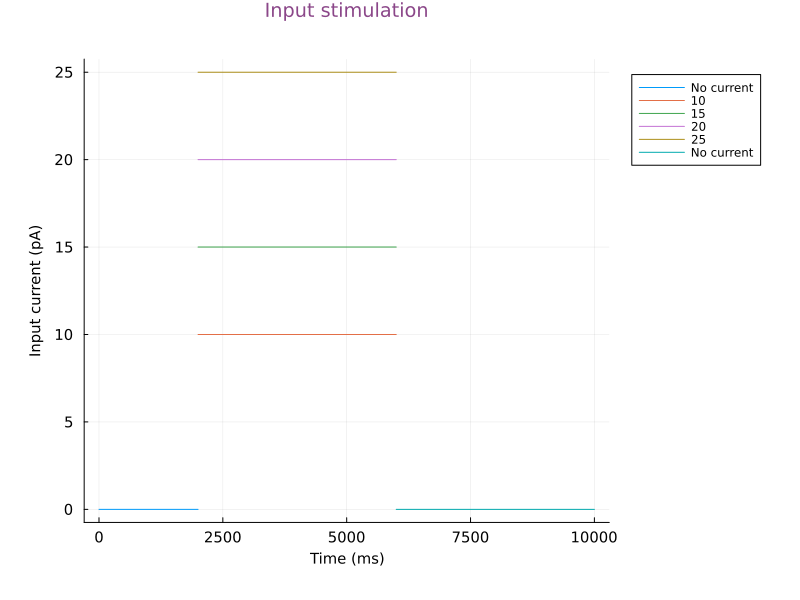

In [92]:
q1= plot(x->0,1:2000, label="No current")
[plot!(x->Is[i],2000:6000, label=string(Is[i]) , legend = :outertopright) for i in eachindex(Is)]

plot!(x->0,6000:10000, label="No current", xlabel="Time (ms)", ylabel="Input current (pA)", title="Input stimulation")



8. Follows the creation of a plot of the input current matrix using the plot(1:10:4000,my_Is[:,:]' ) statement. The 1:10:4000 vector corresponds to the time steps, and the my_Is[:,:]' transpose of the my_Is matrix represents the input currents for each neuron at each time step. This plot visualizes how the input currents vary over time and across different neurons.

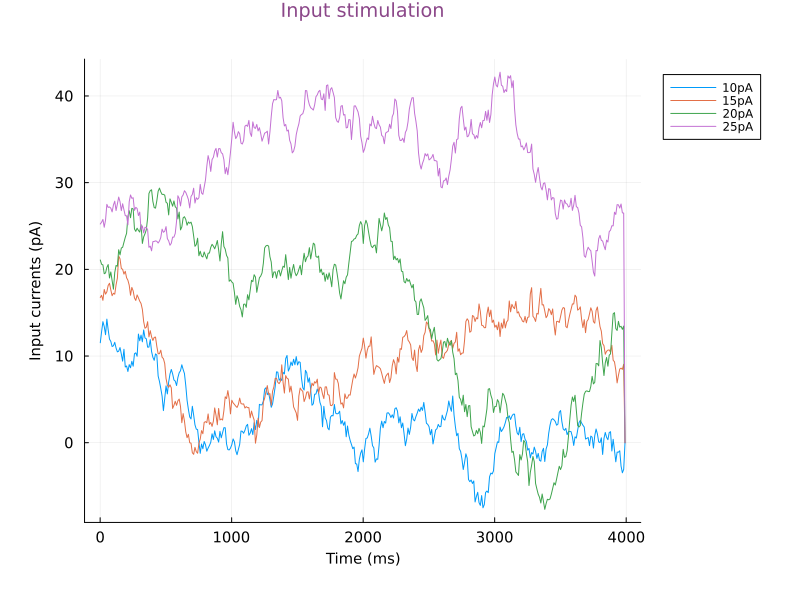

In [93]:
q2= plot(1:10:4000,my_Is[:,:]', 
legend=:outertopright, label= ["10pA" "15pA" "20pA" "25pA"], 
xlabel="Time (ms)", 
ylabel="Input currents (pA)", 
title="Input stimulation")

9. The obtained input currents and membrane potential plots are combined using the _Plot_ function:


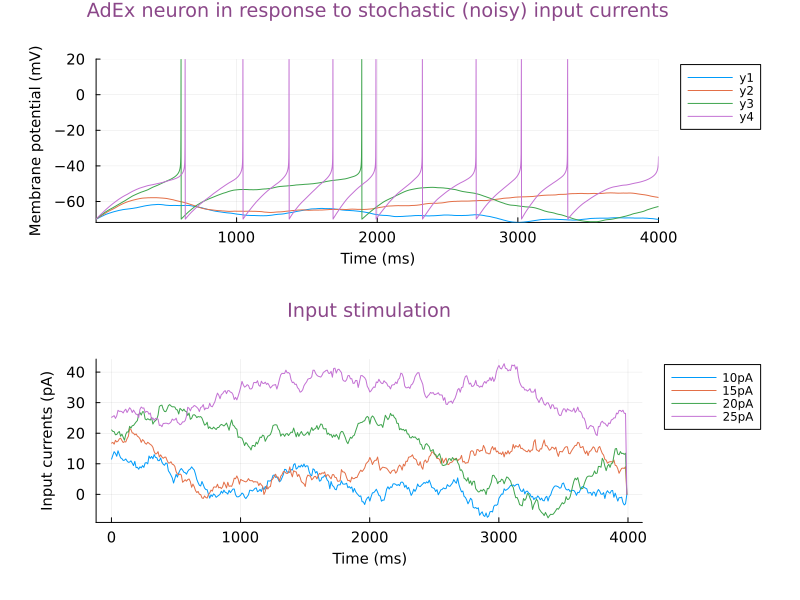

In [94]:
p= plot(SNN.vecplot(E,:v), 
legend= true, 
xlabel="Time (ms)", 
ylabel="Membrane potential (mV)", 
title="AdEx neuron in response to stochastic (noisy) input currents")

f= (plot(p, q2, layout=(2,1)))
plot!(; legend=:outertopright)


10. Finally, the adaptation current is visualised in a plot as follows:

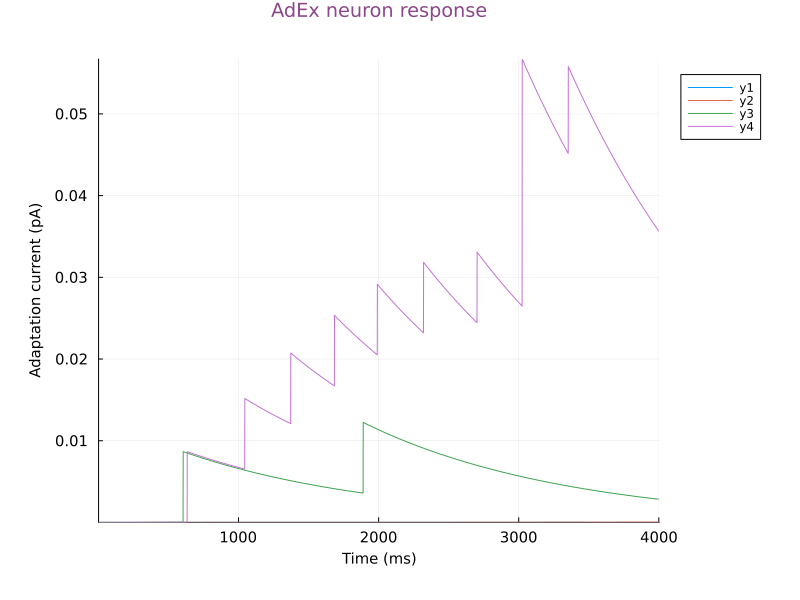

In [95]:
a= plot(SNN.vecplot(E,:w),
palette= (:vanimo10),
xlabel = "Time (ms)", 
ylabel = "Adaptation current (pA)", 
title = "AdEx neuron response")
plot!(; legend=:outertopright)
